# COBRA (part2)

In [27]:
import cobra
from cobra.test import create_test_model
from cobra.flux_analysis import pfba
from cobra.flux_analysis import flux_variability_analysis as fva

import matplotlib.pyplot as plt

In [3]:
model = create_test_model("textbook")
iJO1366 = create_test_model("ecoli")

Using license file C:\Users\user\gurobi.lic
Academic license - for non-commercial use only


## loopless FVA

In [8]:
loop_reactions = [model.reactions.FRD7, model.reactions.SUCDi]
fva(model, reaction_list=loop_reactions, loopless=False)

,minimum,maximum
FRD7,0.000000,994.935624
SUCDi,5.064376,1000.000000


In [9]:
fva(model, reaction_list=loop_reactions, loopless=True)

,minimum,maximum
FRD7,0.000000,0.000000
SUCDi,5.064376,5.064376


In [12]:
# the pfba result is loopless
pfba(model, reactions=loop_reactions)

,fluxes,reduced_costs
FRD7,0.000000,2.0
SUCDi,5.064376,-2.0


## sampling

In [13]:
from cobra.sampling.sampling import sample

sample_sol = sample(model, n=500, method="achr", seed=42)
sample_sol

Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpkbnffemf.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros


,ACALD,ACALDt,ACKr,ACONTa,ACONTb,ACt2r,ADK1,AKGDH,AKGt2r,ALCD2x,...,RPI,SUCCt2_2,SUCCt3,SUCDi,SUCOAS,TALA,THD2,TKT1,TKT2,TPI
0,-0.396325,-0.027888,-0.697635,12.879723,12.879723,-0.697635,25.324242,1.401952,-0.023190,-0.368437,...,-0.088971,0.317674,0.407293,894.371395,-1.401952,0.086904,27.434650,0.086904,0.086072,9.667557
1,-0.519911,-0.475386,-0.565640,10.136273,10.136273,-0.565640,27.313843,3.638964,-0.005718,-0.044525,...,-2.732544,2.255241,2.328998,918.967473,-3.638964,2.724878,29.168468,2.724878,2.721795,7.240659
2,-1.254210,-0.732427,-0.745795,9.460953,9.460953,-0.745795,10.369188,4.254907,-0.795056,-0.521783,...,-0.423432,6.652597,7.003099,727.216907,-4.254907,0.312807,42.959676,0.312807,0.268320,7.718554
3,-1.977109,-0.116771,-4.095202,7.005825,7.005825,-4.095202,4.724118,4.446516,-0.893679,-1.860338,...,-0.594220,13.372865,15.954899,750.509535,-4.446516,0.499514,5.802370,0.499514,0.461430,9.361520
4,-1.955425,-0.267762,-0.462288,10.911845,10.911845,-0.462288,6.368704,3.188231,-1.201486,-1.687663,...,-2.116664,12.945958,13.269472,990.141218,-3.188231,2.085875,11.610764,2.085875,2.073494,7.857967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-2.513508,-1.178277,-0.668139,11.522291,11.522291,-0.668139,1.421943,4.859483,-0.024275,-1.335231,...,-2.648291,22.047350,22.066230,561.342932,-4.859483,2.633726,9.177346,2.633726,2.627869,7.174694
496,-1.272968,-0.295925,-1.175820,10.811857,10.811857,-1.175820,29.124474,5.831564,-0.196730,-0.977043,...,-2.353165,4.423433,6.705611,673.832058,-5.831564,2.319133,16.179386,2.319133,2.305447,7.588639
497,-3.538238,-2.585579,-3.082863,5.716320,5.716320,-3.082863,7.514745,1.196071,-0.109029,-0.952659,...,-4.444533,24.605510,24.745923,838.221370,-1.196071,4.396979,12.221798,4.396979,4.377856,5.451251
498,-3.592521,-2.879884,-0.943437,6.638934,6.638934,-0.943437,20.572839,2.943367,-0.194091,-0.712637,...,-6.666331,26.312679,26.502682,902.349384,-2.943367,6.659796,22.940276,6.659796,6.657168,3.109664


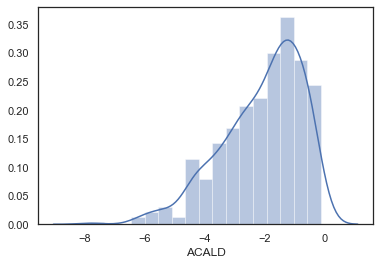

In [41]:
sns.distplot(sample_sol["ACALD"])

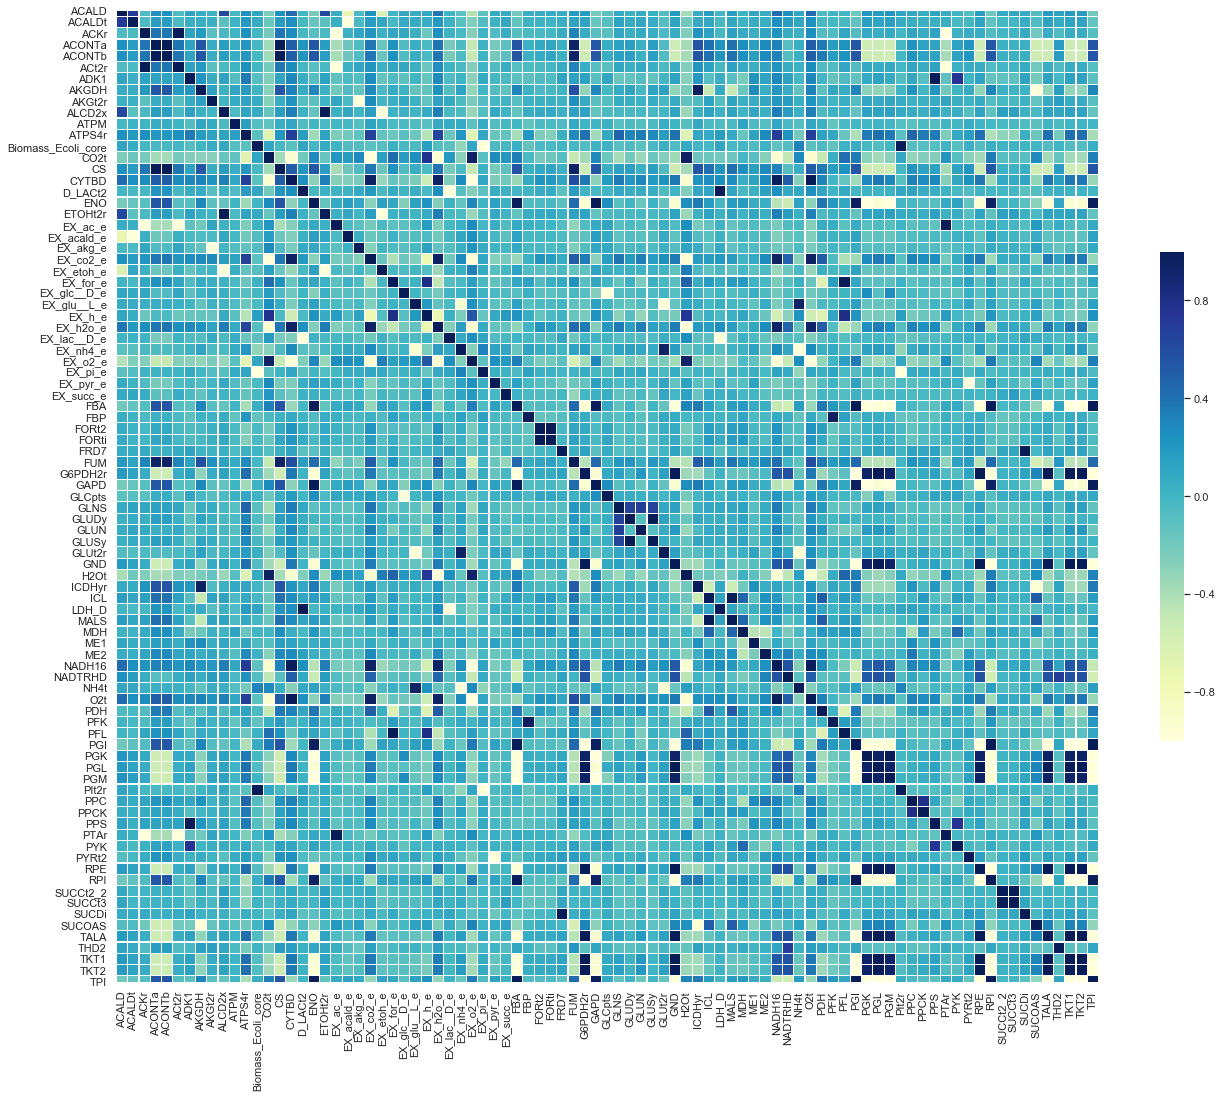

In [28]:
import seaborn as sns

sns.set(style="white")
f, ax = plt.subplots(figsize=(22, 18))
sns.heatmap(sample_sol.loc[:, (sample_sol != 0).all(axis=0)].corr(), cmap="YlGnBu", center=0, square=True, linewidths=.1, cbar_kws={"shrink": .5})

## Gene and reaction essentiality

In [29]:

from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

print('complete model: ', model.slim_optimize())
with model:
    model.reactions.PFK.knock_out()
    print('pfk knocked out: ', model.slim_optimize())

complete model:  0.8739215069684303
pfk knocked out:  0.7040369478590237


In [30]:
gene_deletion_results = single_gene_deletion(model)

gene_deletion_results

,growth,status
ids,,
(b2288),0.211663,optimal
(b0118),0.873922,optimal
(b4232),0.873922,optimal
(b2029),0.863813,optimal
(b1779),0.000000,optimal
...,...,...
(b2935),0.873922,optimal
(b0116),0.782351,optimal
(b3925),0.873922,optimal


In [31]:
# essential genes
gene_deletion_results[(gene_deletion_results["status"] != "optimal") | gene_deletion_results["growth"] < 0.1]

,growth,status
ids,,
(b1779),0.0,optimal
(b0720),0.0,optimal
(b2926),0.0,optimal
(b1136),0.0,optimal
(b2779),0.0,optimal


In [32]:
rxn_deletion_results = single_reaction_deletion(model)
rxn_deletion_results

,growth,status
ids,,
(FUM),0.814298,optimal
(AKGDH),0.858307,optimal
(GAPD),0.000000,optimal
(EX_acald_e),0.873922,optimal
(SUCCt3),0.873922,optimal
...,...,...
(SUCDi),0.814298,optimal
(MALt2_2),0.873922,optimal
(TKT2),0.866674,optimal


In [33]:
# essential reactions
rxn_deletion_results[(rxn_deletion_results["status"] != "optimal") | rxn_deletion_results["growth"] < 0.1]

,growth,status
ids,,
(GAPD),0.0,optimal
(ENO),0.0,optimal
(ICDHyr),0.0,optimal
(GLNS),0.0,optimal
(CS),0.0,optimal
(RPI),0.0,optimal
(PIt2r),0.0,optimal
(EX_h_e),0.0,optimal
(PGK),0.0,optimal


In [34]:
del_double_genes = double_gene_deletion(model)
del_double_genes[(del_double_genes["status"] != "optimal") | del_double_genes["growth"] < 0.1]

,growth,status
ids,,
"(b0720, b1602)",0.0,optimal
"(b1136, b4090)",0.0,optimal
"(b1136, b2296)",0.0,optimal
"(b0720, b2029)",0.0,optimal
"(b0721, b2926)",0.0,optimal
...,...,...
"(b1849, b1136)",0.0,optimal
"(b1773, b2779)",0.0,optimal
"(b1136, b3951)",0.0,optimal


In [35]:
del_double_rxns = double_reaction_deletion(model)
del_double_rxns[(del_double_rxns["status"] != "optimal") | del_double_rxns["growth"] < 0.1]

,growth,status
ids,,
"(ICL, CS)",0.0,optimal
"(SUCCt3, RPI)",0.0,optimal
"(GLNS, PDH)",0.0,optimal
"(ICDHyr, PIt2r)",0.0,optimal
"(ACKr, RPI)",0.0,optimal
...,...,...
"(PPC, RPI)",0.0,optimal
"(EX_pi_e, PPCK)",0.0,optimal
"(EX_lac__D_e, ACONTa)",0.0,optimal


## Consistency testing

In [36]:
# find block reactions (cannot generate flux)
blocked_reactions = cobra.flux_analysis.find_blocked_reactions(iJO1366)
blocked_reactions

['DM_aacald_c',
 'EX_14glucan_e',
 'EX_23camp_e',
 'EX_23ccmp_e',
 'EX_23cgmp_e',
 'EX_23cump_e',
 'EX_23dappa_e',
 'EX_26dap__M_e',
 'EX_2ddglcn_e',
 'EX_34dhpac_e',
 'EX_3amp_e',
 'EX_3cmp_e',
 'EX_3gmp_e',
 'EX_3hcinnm_e',
 'EX_3hpppn_e',
 'EX_3ump_e',
 'EX_4hoxpacd_e',
 'EX_LalaDglu_e',
 'EX_LalaLglu_e',
 'EX_acac_e',
 'EX_acgal_e',
 'EX_acgal1p_e',
 'EX_acgam_e',
 'EX_acgam1p_e',
 'EX_acmana_e',
 'EX_acmum_e',
 'EX_acnam_e',
 'EX_adocbl_e',
 'EX_ag_e',
 'EX_ala_B_e',
 'EX_all__D_e',
 'EX_amp_e',
 'EX_arab__L_e',
 'EX_arbt_e',
 'EX_arbtn_e',
 'EX_arbtn_fe3_e',
 'EX_ascb__L_e',
 'EX_aso3_e',
 'EX_btn_e',
 'EX_but_e',
 'EX_butso3_e',
 'EX_cbi_e',
 'EX_cd2_e',
 'EX_chol_e',
 'EX_chtbs_e',
 'EX_cm_e',
 'EX_cmp_e',
 'EX_cpgn_e',
 'EX_cpgn_un_e',
 'EX_crn_e',
 'EX_crn__D_e',
 'EX_csn_e',
 'EX_cu_e',
 'EX_cyan_e',
 'EX_cynt_e',
 'EX_cys__D_e',
 'EX_dad_2_e',
 'EX_damp_e',
 'EX_dca_e',
 'EX_dcmp_e',
 'EX_dcyt_e',
 'EX_ddca_e',
 'EX_dgmp_e',
 'EX_dgsn_e',
 'EX_dimp_e',
 'EX_din_e',
 'EX_dms

In [37]:
from cobra.flux_analysis import fastcc

consistent_iJO1366 = fastcc(iJO1366)
consistent_iJO1366

Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpobzdpnaw.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros


Name,iJO1366
Memory address,0x01e7172440b8
Number of metabolites,1155
Number of reactions,1703
Number of groups,37
Objective expression,1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Compartments,"cytosol, extracellular space, periplasm"


In [38]:
iJO1366

Name,iJO1366
Memory address,0x01e7002bf320
Number of metabolites,1805
Number of reactions,2583
Number of groups,37
Objective expression,1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Compartments,"cytosol, extracellular space, periplasm"


In [39]:
len(set([r.id for r in consistent_iJO1366.reactions]) ^ (set([r.id for r in iJO1366.reactions]) - set(blocked_reactions)))

2

In [40]:
set([r.id for r in consistent_iJO1366.reactions]) ^ (set([r.id for r in iJO1366.reactions]) - set(blocked_reactions))

{'ARBt2rpp', 'CTECOAI6'}